<a href="https://colab.research.google.com/github/Tstrebe2/umich-mads-capstone-project/blob/main/tim-image-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

!{sys.executable} -m pip install pydicom -q

     |████████████████████████████████| 2.0 MB 10.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output

path = '/content/drive/MyDrive/capstone/assets/stage_2_train_images.zip'

clear_output(wait=True)
!unzip {path}

In [16]:
import pandas as pd
import numpy as np

from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import pydicom as dicom
import os

In [13]:
root_path = '/content/'
df_target = pd.read_csv(os.path.join(root_path, 'drive/MyDrive/capstone/assets/stage_2_train_labels.csv.zip'))

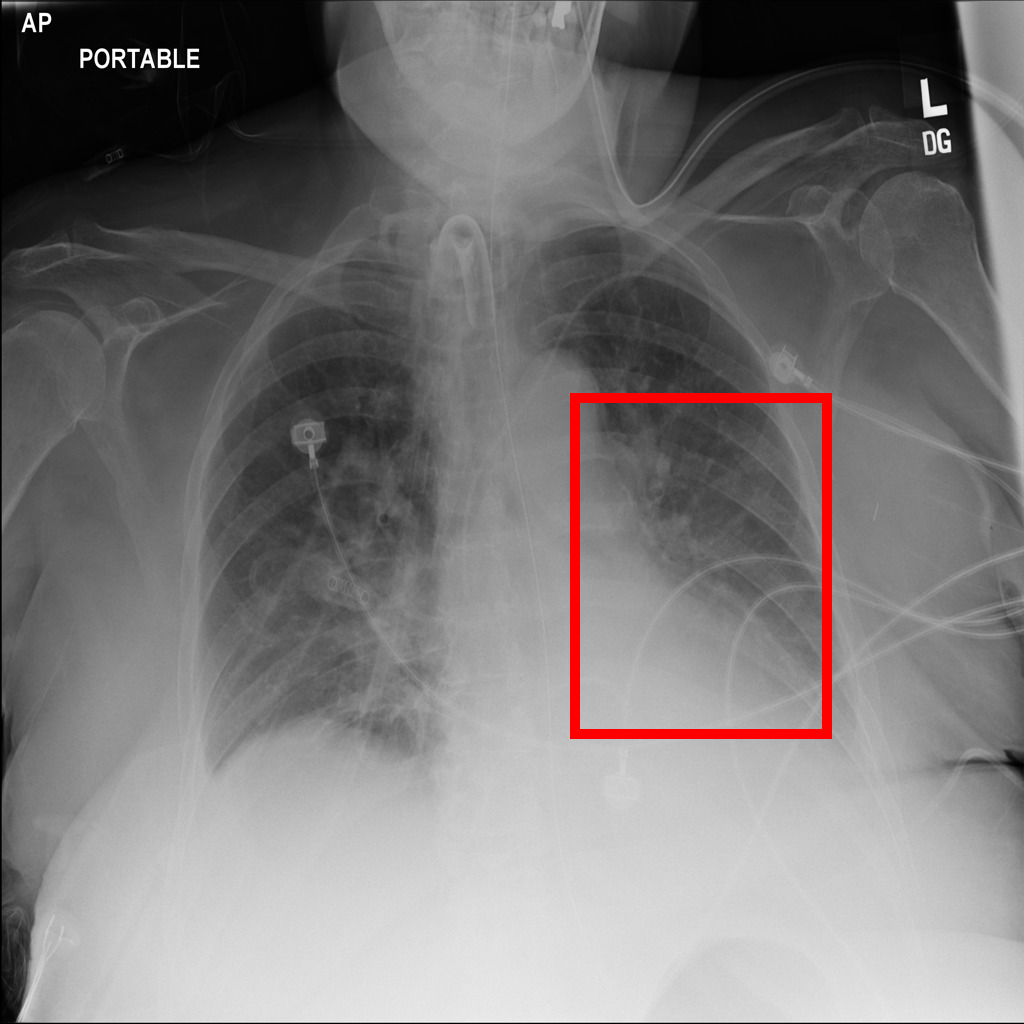

In [108]:
def draw_box(image, x, y, w, h):
  draw=ImageDraw.Draw(image)
  draw.rectangle([(x, y), (w+x, h+y)], outline='red', width=10)
  return image

patient_id, x, y, w, h = df_target[df_target['Target'] == 1].iloc[-2, [0, 1, 2, 3, 4]]

img_path = os.path.join(root_path, patient_id) + '.dcm'

image = dicom.dcmread(img_path)
image = Image.fromarray(image.pixel_array).convert(mode='RGB')

draw_box(image, x, y, w, h)

In [88]:
x, y, w, h = df_target[df_target['Target'] == 1].iloc[:, [1, 2, 3, 4]].values.T

Which side of the body are most lesions found on?

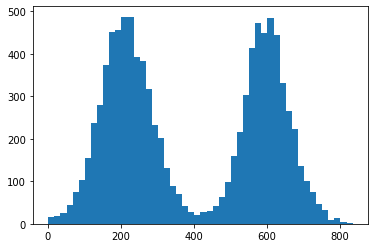

In [93]:
plt.hist(x, bins=50)
plt.show()